## Definição do *dataset*

O *dataset* utilizado será o "Electromyogram  (EMG)  Feature Reduction  Using Mutual ComponentsAnalysis for Multifunction  Prosthetic  Fingers Control" [1]. Maiores informações podem ser vistas no site: https://www.rami-khushaba.com/electromyogram-emg-repository.html

De acordo com a figura seguinte, neste *dataset* existem 15 movimentos de 8 pessoas diferentes. Algumas questões de projetos foram levadas em consideração:
1. Cada pessoa possui uma pasta com 45 arquivos .csv, cada arquivo refere-se à 1 movimento. Cada movimento possui 3 tentativas.
2. São 8 eletrodos no total e cada movimento possui 80.000 samples por eletrodo.

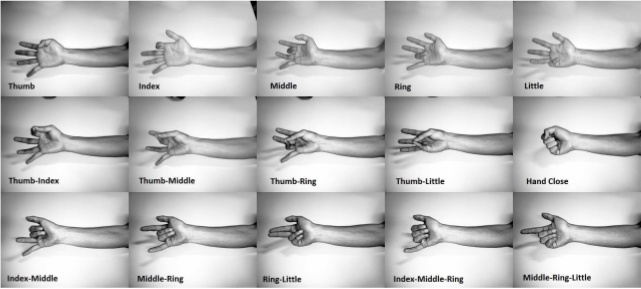

[1] Rami N. Khushaba, Sarath Kodagoda, Dikai Liu, and Gamini Dissanayake "Electromyogram  (EMG)  Feature Reduction  Using Mutual ComponentsAnalysis for Multifunction  Prosthetic  Fingers Control". https://onedrive.live.com/?authkey=%21Ar1wo75HiU9RrLM&cid=AAA78954F15E6559&id=AAA78954F15E6559%21316&parId=AAA78954F15E6559%21312&o=OneUp



### Dependências

In [19]:
import numpy as np
from numpy import genfromtxt
import math
from librosa import stft
from scipy.signal import stft

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Carregando dataset

Shape da matriz: 15 movimentos, 3 tentativas, 8 eletrodos, 80.000 samples

In [21]:
data = np.array([[genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/HC_1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/HC_2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/HC_3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/I_I1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/I_I2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/I_I3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/I_M1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/I_M2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/I_M3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/IMR1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/IMR2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/IMR3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/L_L1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/L_L2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/L_L3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/M_M1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/M_M2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/M_M3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/M_R1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/M_R2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/M_R3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/MRL1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/MRL2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/MRL3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/R_L1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/R_L2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/R_L3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/R_R1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/R_R2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/R_R3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_I1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_I2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_I3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_L1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_L2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_L3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_M1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_M2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_M3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_R1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_R2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_R3.csv', delimiter=',', unpack=True)],
                [genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_T1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_T2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/T_T3.csv', delimiter=',', unpack=True)]]
               )

print(data.shape)

(15, 3, 8, 80000)


### Segmentação dos dados

In [24]:
data = data[:,:,:,0:20000]
print(data.shape)
# Definição do salto e do tamanho do segmento (segmento - salto = sobreposição)
salto = 470
segmento = 1024
n_win = int((data.shape[-1] - segmento) / salto) + 1
ids = np.arange(n_win) * salto
x = np.array([data[:,:,:,k:(k + segmento)] for k in ids]).transpose(1, 2, 3, 0, 4)
print(x.shape)

(15, 3, 8, 20000)
(15, 3, 8, 41, 1024)


### Extraindo características no domínio do tempo

* `Mean Absolute Value (MAV)`: 
    > $\frac{1}{N}\sum_{i=1}^{N}|x_i|$

In [26]:
print(x.shape)
mav = np.sum(abs(x)/800, axis=-1)
print(mav.shape)

(15, 3, 8, 41, 1024)
(15, 3, 8, 41)


* `Variance of EMG (VAR)`: 
    > $\frac{1}{N-1}\sum_{i=1}^{N}x_i^2$

In [27]:
print(x.shape)
var = np.sum(np.power(x, 2)/799, axis=-1)
print(var.shape)

(15, 3, 8, 41, 1024)
(15, 3, 8, 41)


* `Simple Square Integral (SSI)`: 
    > $\sum_{i=1}^{N}|x_i|^2$

In [8]:
print(x.shape)
ssi = np.sum(np.power(abs(x), 2), axis=-1)
print(ssi.shape)

(15, 3, 8, 41, 1024)
(15, 3, 8, 41)


* `Root Mean Square (RMS)`: 
    > $\sqrt{\frac{1}{N}\sum_{i=1}^{N}|x_i|^2}$

In [9]:
print(x.shape)
rms = np.sqrt(np.sum((np.power(abs(x), 2))/800, axis=-1))
print(rms.shape)

(15, 3, 8, 41, 1024)
(15, 3, 8, 41)


### Extraindo características no domínio da frequência

#### Transformação para o domínio da frequência

Aplicando stft no último eixo de data (3), com janela de 1024 e sobreposição de 512

In [29]:
print(data.shape)
_, _, w = stft(data, fs=4000, nperseg=1024, noverlap=512)
w = np.swapaxes(w, 3, 4)
print(w.shape)

(15, 3, 8, 20000)
(15, 3, 8, 41, 513)


#### Power Spectrum Density (PSD)

Quadrado do valor absoluto do FFT

In [31]:
psd = np.power(abs(w), 2)
print(psd.shape)

(15, 3, 8, 41, 513)


* `Frequency Median (FMD)`: 
    > $\frac{1}{2}\sum_{i=1}^{M}PSD$

In [33]:
fmd = np.sum(psd/2, axis=-1)
print(fmd.shape)

(15, 3, 8, 41)


* `Frequency Mean (FMN)`: 
    > $FMN = \frac{\sum_{i=1}^{M}f_i PSD}{\sum_{i=1}^{M}PSD_i}$
    
    > $f_i = \frac{i * SampleRate}{2M}$

In [14]:
# Calculando FMN

sampleRate = 4000
M = 513
f = np.array([(i*sampleRate)/(2*M) for i in range(1,M+1)])

fmn = np.divide((np.sum(np.multiply(psd,f), axis = -1)), (np.sum(psd, axis=-1)))

print(fmn.shape)

(15, 3, 8, 41)


#### Criando vetor de características 

In [15]:
features = list()
for feature in (mav, var, ssi, rms, fmd, fmn):
    feature = feature.transpose(0, 1, 3, 2)
    feature = feature.reshape(15 * 3 * 41, 8)
#    print('Feature: {}'.format(feature), feature.shape)
    features.append(feature)

X = np.concatenate(features, axis=-1)
X.shape

(1845, 48)

#### Criando vetor de labels

In [16]:
y = np.array([[str(i)] * int(X.shape[0] / 15) for i in range(15)])
y = y.reshape(y.shape[0] * y.shape[1])
y.shape

(1845,)

#### Aplicando classificador SVM

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Testando Acurácia

In [18]:
res = clf.predict(X_test)
tot_hit = sum([1 for i in range(len(res)) if res[i] == y_test[i]])
print('Acurácia: {:.2f}%'.format(tot_hit / X_test.shape[0] * 100))

Acurácia: 9.03%
